Here, I will be plotting ROC / PR curves for models with zero predictive power (random etc) on balanced/imbalanced classification data sets to see what they look like. I'm just trying to gain more intuitions about ROC curves by playing around with them :-)

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
def plot_roc_curve(false_positive_rate: np.array, true_positive_rate: np.array):
    plt.figure()
    plt.title("ROC Curve")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.scatter(false_positive_rate, true_positive_rate)
    plt.show()

def plot_precision_recall_curve(recall: np.array, precision: np.array):
    plt.figure()
    plt.title("Precision Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.scatter(recall, precision)
    plt.show()

In [24]:
def calculate_roc_and_plot(labels: np.array, predictions: np.array):
    assert labels.size == predictions.size, 'Labels and Predictions should have same dimension'

    number_of_thresholds_to_plot = 1000

    step = 1/number_of_thresholds_to_plot
    thresholds = np.arange(0, 1, step)
    false_positive_rate = np.zeros((thresholds.size,))
    true_positive_rate = np.zeros((thresholds.size,))
    recall = np.zeros((thresholds.size,))
    precision = np.zeros((thresholds.size,))
    for j in range(0, thresholds.size):
        all_positives = 0
        all_negatives = 0
        true_positives = 0
        false_positives = 0
        threshold = thresholds[j]
        # O(nm) to iterate over labels
        for i in range(0, labels.size):
            label = labels[i]
            prediction = predictions[i] >= threshold
            if label == 1:
                all_positives += 1
            else:
                all_negatives += 1
            if prediction:
                if label == 1:
                    true_positives += 1
                else:
                    false_positives += 1
        false_positive_rate[j] = false_positives / all_negatives if all_negatives != 0 else 1
        true_positive_rate[j] = true_positives / all_positives if all_positives != 0 else 1
        recall[j] = true_positives / all_positives if all_positives != 0 else 1
        precision[j] = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 1
        # print("All Positives ", all_positives)
        # print("All Negatives ", all_negatives)
        # print("True Positives ", true_positives)
        # print("False Positives ", false_positives)
        # print("True Positive Rate ", true_positives / all_positives)
        # print("False Positive Rate ", false_positives / all_negatives)
    plot_roc_curve(false_positive_rate, true_positive_rate)
    plot_precision_recall_curve(recall, precision)

/var/folders/sj/4ppqypzj3_g19slbdhpv7pfh0000gn/T/ipykernel_55617/399837607.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  balanced_labels = np.random.random_integers(0,1, 1000)


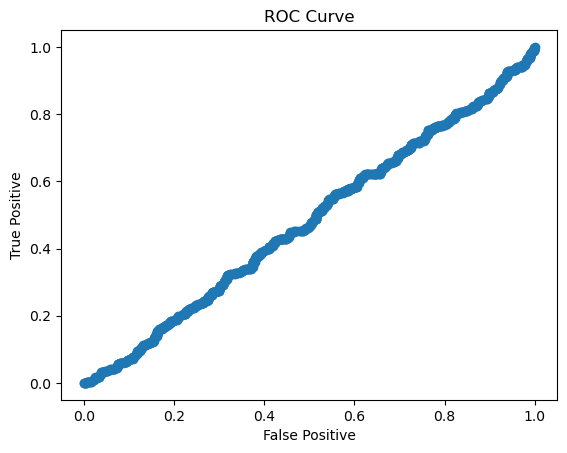

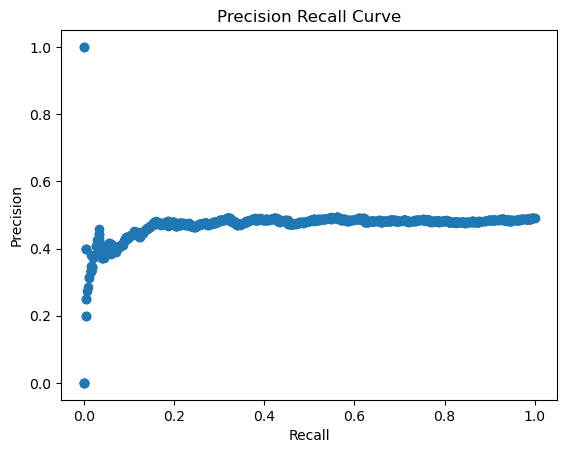

In [25]:
# Balanced case
balanced_labels = np.random.random_integers(0,1, 1000)
balanced_distributed_predictions = np.random.random(1000)
calculate_roc_and_plot(balanced_labels, balanced_distributed_predictions)

/var/folders/sj/4ppqypzj3_g19slbdhpv7pfh0000gn/T/ipykernel_55617/1961904287.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  labels = np.append(np.random.random_integers(0,1,500), np.zeros(500))


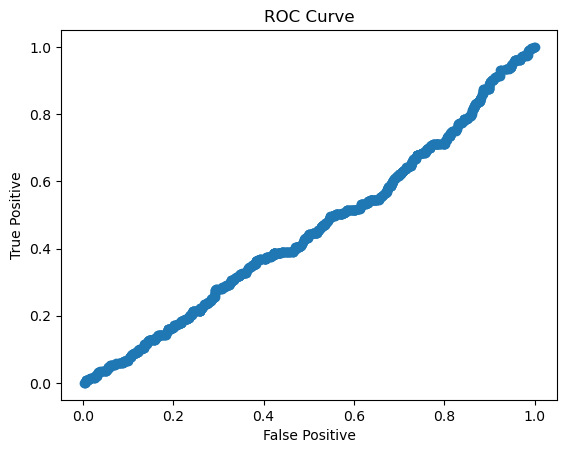

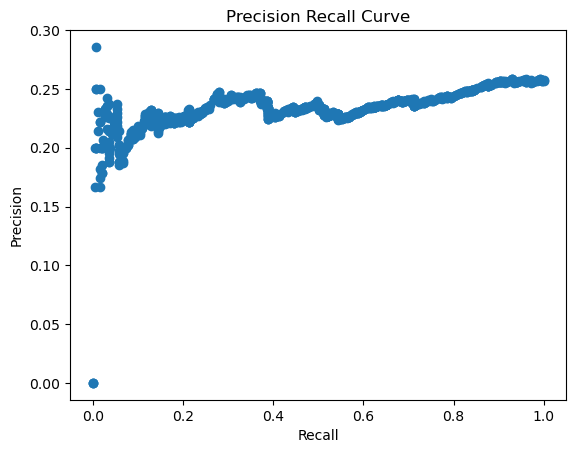

In [26]:
# Imbalanced (more negative) labels, balanced predictions
labels = np.append(np.random.random_integers(0,1,500), np.zeros(500))
np.random.shuffle(labels)
imbalanced_labels = labels
balanced_distributed_predictions = np.random.random(1000)
calculate_roc_and_plot(imbalanced_labels, balanced_distributed_predictions)

/var/folders/sj/4ppqypzj3_g19slbdhpv7pfh0000gn/T/ipykernel_55617/591252129.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  labels = np.append(np.random.random_integers(0,1,100), np.ones(900))


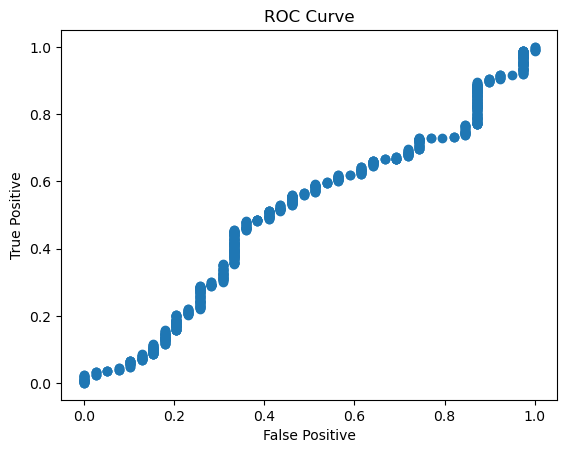

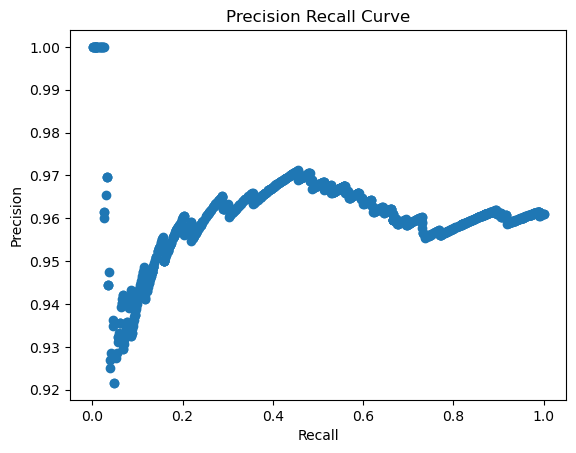

In [27]:
# Imbalanced (more positive) labels, balanced predictions
labels = np.append(np.random.random_integers(0,1,100), np.ones(900))
np.random.shuffle(labels)
imbalanced_labels = labels
balanced_distributed_predictions = np.random.random(1000)
calculate_roc_and_plot(imbalanced_labels, balanced_distributed_predictions)

/var/folders/sj/4ppqypzj3_g19slbdhpv7pfh0000gn/T/ipykernel_55617/3411605088.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  labels = np.append(np.random.random_integers(0,1,500), np.ones(500))


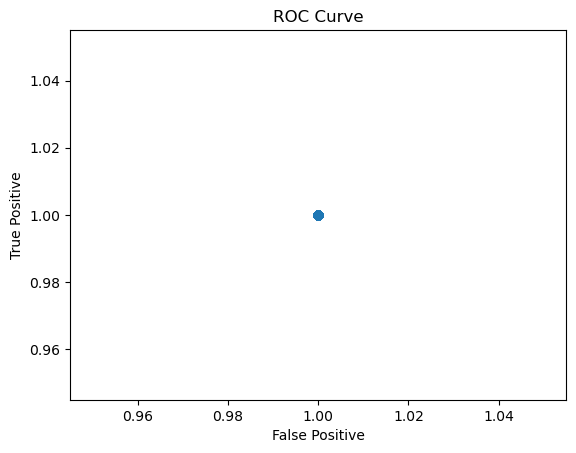

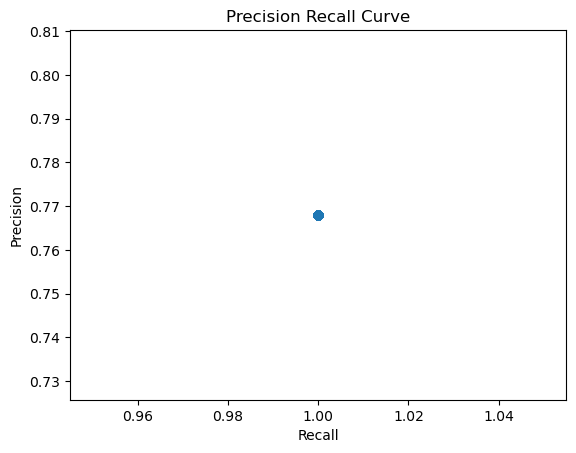

In [28]:
# Imbalanced (more positive) labels, all predictions positive
labels = np.append(np.random.random_integers(0,1,500), np.ones(500))
np.random.shuffle(labels)
all_positive_predictions = np.ones(1000)
calculate_roc_and_plot(labels, all_positive_predictions)

/var/folders/sj/4ppqypzj3_g19slbdhpv7pfh0000gn/T/ipykernel_55617/2958563897.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  labels = np.append(np.random.random_integers(0,1,500), np.ones(500))


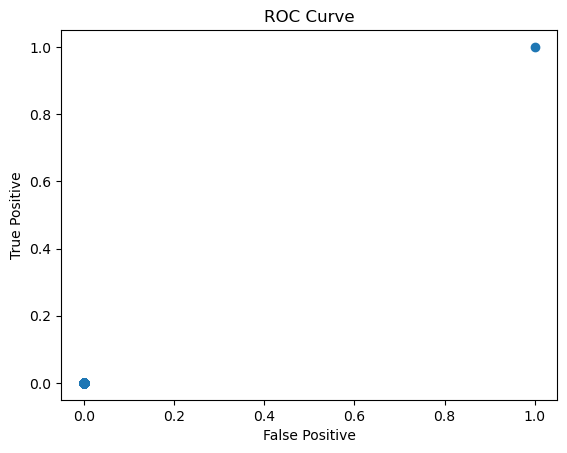

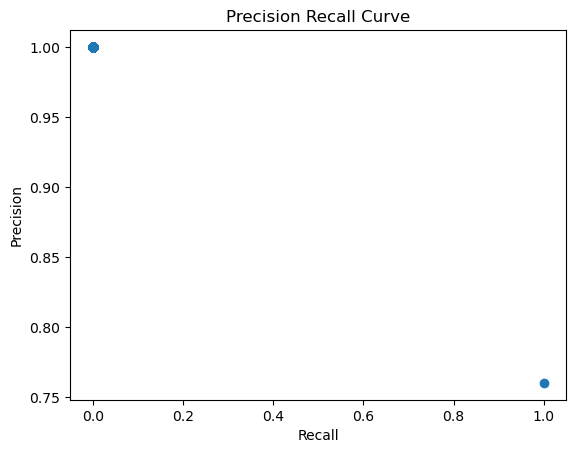

In [29]:
# Imbalanced (more positive) labels, all predictions negative
labels = np.append(np.random.random_integers(0,1,500), np.ones(500))
np.random.shuffle(labels)
all_negative_predictions = np.zeros(1000)
calculate_roc_and_plot(labels, all_negative_predictions)

0.952
0.8384328598125639


/var/folders/sj/4ppqypzj3_g19slbdhpv7pfh0000gn/T/ipykernel_55617/3815844252.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  labels = np.append(np.random.random_integers(0,1,100), np.ones(900))


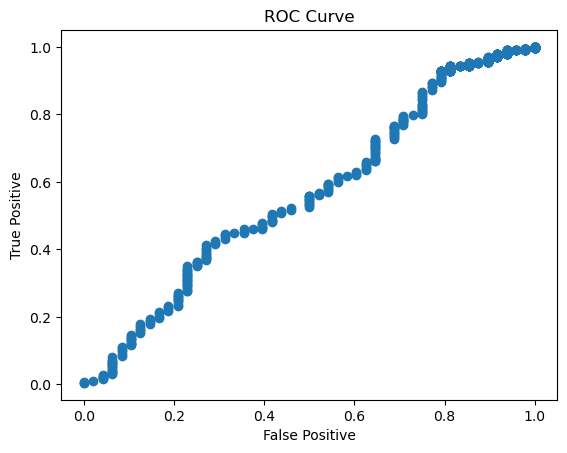

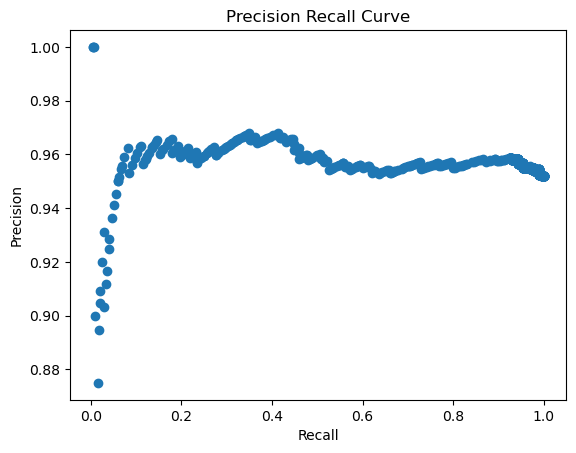

In [30]:
# Imbalanced (more positive) labels, imbalanced predictions (in the same direction)
# Note that, given the predictions are weighted toward the dominant class, I don't think you can call this 
# "having no predictive power" anymore -- it's a crude model that has learned predicting the dominant class helps
labels = np.append(np.random.random_integers(0,1,100), np.ones(900))
np.random.shuffle(labels)
print(labels.mean())
positively_weighted_predictions = np.append(np.random.random(100), (np.random.random(900)/4 + 0.75))
print(positively_weighted_predictions.mean())
np.random.shuffle(positively_weighted_predictions)
calculate_roc_and_plot(labels, positively_weighted_predictions)